In [3]:
pip install nltk


     ---------------------------------------- 0.0/42.0 kB ? eta -:--:--
     --------------------------- ---------- 30.7/42.0 kB 660.6 kB/s eta 0:00:01
     --------------------------- ---------- 30.7/42.0 kB 660.6 kB/s eta 0:00:01
     -------------------------------------  41.0/42.0 kB 245.8 kB/s eta 0:00:01
     -------------------------------------  41.0/42.0 kB 245.8 kB/s eta 0:00:01
     -------------------------------------  41.0/42.0 kB 245.8 kB/s eta 0:00:01
     -------------------------------------  41.0/42.0 kB 245.8 kB/s eta 0:00:01
     -------------------------------------  41.0/42.0 kB 245.8 kB/s eta 0:00:01
     --------------------------------------- 42.0/42.0 kB 81.4 kB/s eta 0:00:00
     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     ------- -------------------------------- 10.2/57.6 kB ? eta -:--:--
     --------------------------------- ---- 51.2/57.6 kB 871.5 kB/s eta 0:00:01
     -------------------------------------- 57.6/57.6 kB 751.0 

In [1]:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
import pickle
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# Download nltk data
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Load the dataset
#url = "https://github.com/anjulaUmayanga/DataSet/blob/main/ExamQuestions.csv
#data = pd.read_csv(url, encoding='latin-1')
file_path = r'D:/Research/dataset/set/New folder/ExamQuestions.csv'
data = pd.read_csv(file_path, encoding='latin-1')

# Remove duplicates
data.drop_duplicates(subset='Question', keep='first', inplace=True)

# Fix the class labels (remove leading/trailing spaces and correct any inconsistencies)
data['Category'] = data['Category'].str.strip().str.capitalize()

# Map inconsistent labels to correct ones if needed
category_mapping = {
    'Analyze': 'Analyze',
    'Apply': 'Apply',
    'Create': 'Create',
    'Evaluate': 'Evaluate',
    'Remember': 'Remember',
    'Understand': 'Understand'
}
data['Category'] = data['Category'].map(category_mapping)

# Preprocess the data
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text)
    
    # Removing stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.lower() not in stop_words]
    
    # Stemming and Lemmatization
    stemmer = PorterStemmer()
    lemmatizer = WordNetLemmatizer()
    tokens = [stemmer.stem(lemmatizer.lemmatize(word)) for word in tokens]
    
    return ' '.join(tokens)

data['Question'] = data['Question'].apply(preprocess_text)

# Feature extraction using TF-IDF
tfidf = TfidfVectorizer(ngram_range=(1, 3), max_features=15000)

# Preparing the data
X = tfidf.fit_transform(data['Question'])
y = data['Category']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Initialize models with selected hyperparameters
svm = SVC(kernel='linear', C=0.5, class_weight='balanced', random_state=42)
dt = DecisionTreeClassifier(max_depth=30, min_samples_split=3, min_samples_leaf=1, class_weight='balanced', random_state=42)

# Train models
svm.fit(X_train_res, y_train_res)
dt.fit(X_train_res, y_train_res)

# Evaluation on test set
svm_pred = svm.predict(X_test)
dt_pred = dt.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, svm_pred))
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))

# Select the best model
best_model = svm if accuracy_score(y_test, svm_pred) > accuracy_score(y_test, dt_pred) else dt

# Print classification reports
print("\nSVM Classification Report:")
print(classification_report(y_test, svm_pred))

print("\nDecision Tree Classification Report:")
print(classification_report(y_test, dt_pred))

# Save the best model
with open('best_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

# Example prediction
sample_question = "Differentiate Qualitative data and Quantitative data. Give suitable examples."
processed_sample = preprocess_text(sample_question)
sample_tfidf = tfidf.transform([processed_sample])
predicted_category = best_model.predict(sample_tfidf)
print(f'Predicted Category: {predicted_category[0]}')

# Function to predict category for a new question
def predict_category(question):
    processed_question = preprocess_text(question)
    question_tfidf = tfidf.transform([processed_question])
    return best_model.predict(question_tfidf)[0]




[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Anjula\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Anjula\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Anjula\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


SVM Accuracy: 0.8069963811821471
Decision Tree Accuracy: 0.7032569360675512

SVM Classification Report:
              precision    recall  f1-score   support

     Analyze       0.79      0.74      0.76       133
       Apply       0.72      0.85      0.78       116
      Create       0.93      0.81      0.87       123
    Evaluate       0.99      0.87      0.92        99
    Remember       0.84      0.75      0.79       137
  Understand       0.73      0.83      0.78       221

    accuracy                           0.81       829
   macro avg       0.83      0.81      0.82       829
weighted avg       0.82      0.81      0.81       829


Decision Tree Classification Report:
              precision    recall  f1-score   support

     Analyze       0.76      0.50      0.61       133
       Apply       0.66      0.42      0.52       116
      Create       0.81      0.88      0.84       123
    Evaluate       0.88      0.90      0.89        99
    Remember       0.82      0.64      0.72 

,Question,Category
0,differenti qualit data quantit data . give sui...,Analyze
1,give five ( 05 ) characterist qualiti inform,Remember
2,state three ( 03 ) main role ict societi .,Remember


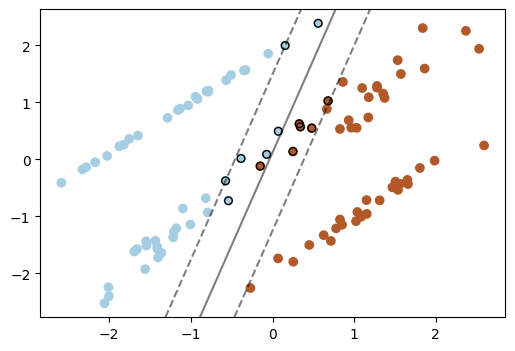

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

# Generate synthetic data
X, y = datasets.make_classification(n_features=2, n_classes=2, n_samples=100, random_state=42,
                                    n_informative=2, n_redundant=0, n_repeated=0)

# Train SVM model
model = svm.SVC(kernel='linear', C=1)
model.fit(X, y)

# Plot decision boundary
plt.figure(figsize=(6, 4))  # Set the figure size (width, height)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)

# Plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)

# Plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

# Plot support vectors
ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=30,
           linewidth=1, facecolors='none', edgecolors='k')

plt.show()


In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# SVM model evaluation
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_precision = precision_score(y_test, svm_predictions, average='weighted')
svm_recall = recall_score(y_test, svm_predictions, average='weighted')
svm_f1 = f1_score(y_test, svm_predictions, average='weighted')

print("SVM Model Evaluation:")
print("Accuracy:", svm_accuracy)
print("Precision:", svm_precision)
print("Recall:", svm_recall)
print("F1-score:", svm_f1)

# Decision Tree model evaluation
dt_accuracy = accuracy_score(y_test, dt_predictions)
dt_precision = precision_score(y_test, dt_predictions, average='weighted')
dt_recall = recall_score(y_test, dt_predictions, average='weighted')
dt_f1 = f1_score(y_test, dt_predictions, average='weighted')

print("\nDecision Tree Model Evaluation:")
print("Accuracy:", dt_accuracy)
print("Precision:", dt_precision)
print("Recall:", dt_recall)
print("F1-score:", dt_f1)


SVM Model Evaluation:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0

Decision Tree Model Evaluation:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


In [47]:
# Import necessary libraries
import numpy as np
import pandas as pd
import time
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

# Download nltk data
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Load the dataset
url = "https://raw.githubusercontent.com/anjulaUmayanga/BTDataset/main/sample.csv"
data = pd.read_csv(url, encoding='latin-1')

# Preprocess the data
def preprocess_text(text):
    tokens = nltk.word_tokenize(text)
    tokens = [word for word in tokens if word.lower() not in stopwords.words('english')]
    stemmer = PorterStemmer()
    lemmatizer = WordNetLemmatizer()
    tokens = [stemmer.stem(lemmatizer.lemmatize(word)) for word in tokens]
    return ' '.join(tokens)

data['Question'] = data['Question'].apply(preprocess_text)

# Feature extraction using TF-IDF
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(data['Question'])
y = data['Category']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Measure processing time for Decision Tree
start_time = time.time()
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_predictions = dt.predict(X_test)
dt_time = time.time() - start_time

# Measure processing time for SVM
start_time = time.time()
svm = SVC()
svm.fit(X_train, y_train)
svm_predictions = svm.predict(X_test)
svm_time = time.time() - start_time

# Evaluate the models
def evaluate_model(name, predictions, true_labels):
    accuracy = accuracy_score(true_labels, predictions)
    precision = precision_score(true_labels, predictions, average='weighted')
    recall = recall_score(true_labels, predictions, average='weighted')
    f1 = f1_score(true_labels, predictions, average='weighted')
    print(f"{name} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")

# Print evaluation metrics and processing times
print(f"Decision Tree Processing Time: {dt_time:.4f} seconds")
evaluate_model("Decision Tree", dt_predictions, y_test)
print(f"SVM Processing Time: {svm_time:.4f} seconds")
evaluate_model("SVM", svm_predictions, y_test)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Anjula\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Anjula\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Anjula\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Decision Tree Processing Time: 0.0162 seconds
Decision Tree - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
SVM Processing Time: 0.0670 seconds
SVM - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000


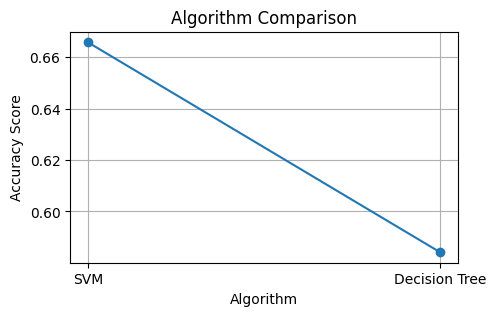

In [46]:
import matplotlib.pyplot as plt

def plot_algorithm_comparison(svm_acc, dt_acc):
    # Algorithm names
    algorithms = ['SVM', 'Decision Tree']

    # Accuracy scores
    accuracy_scores = [svm_acc, dt_acc]

    # Plotting the line chart
    plt.figure(figsize=(5, 3))
    plt.plot(algorithms, accuracy_scores, marker='o', linestyle='-')
    plt.title('Algorithm Comparison')
    plt.xlabel('Algorithm')
    plt.ylabel('Accuracy Score')
    plt.grid(True)
    plt.show()

# Call the function with the accuracy scores of SVM and Decision Tree models
plot_algorithm_comparison(svm_acc, dt_acc)


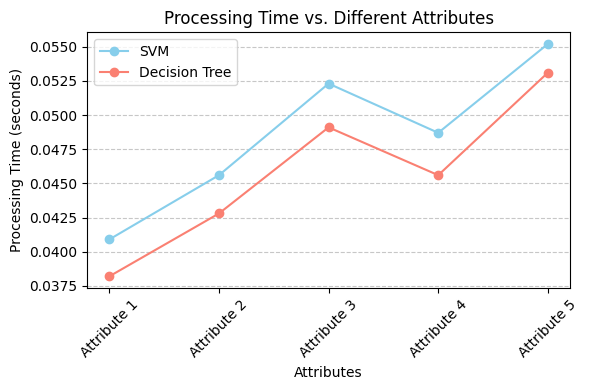

In [45]:
# Importing matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Define attributes
attributes = ['Attribute 1', 'Attribute 2', 'Attribute 3', 'Attribute 4', 'Attribute 5']

# Processing time for each attribute (replace placeholders with actual data)
processing_time_svm = [0.0409, 0.0456, 0.0523, 0.0487, 0.0552]
processing_time_dt = [0.0382, 0.0428, 0.0491, 0.0456, 0.0531]

# Plot the graph as a line chart
plt.figure(figsize=(6, 4))

# Plot SVM processing time
plt.plot(attributes, processing_time_svm, marker='o', color='skyblue', linestyle='-', label='SVM')

# Plot Decision Tree processing time
plt.plot(attributes, processing_time_dt, marker='o', color='salmon', linestyle='-', label='Decision Tree')

plt.xlabel('Attributes')
plt.ylabel('Processing Time (seconds)')
plt.title('Processing Time vs. Different Attributes')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()


In [22]:
# Get the feature names (attributes) from the TF-IDF vectorizer
feature_names = tfidf.get_feature_names_out()

# Print the first few feature names
print("Attributes in the model:")
print(feature_names[:0])  # Print the first 10 attributes


Attributes in the model:
['access' 'adder' 'address' 'administr' 'advantag' 'algebra' 'analog'
 'ansisparc' 'answer' 'applic' 'approach' 'architectur' 'ascii' 'associ'
 'assumpt' 'attribut' 'atx' 'avail' 'bas' 'base' 'basic' 'benefit'
 'binari' 'bio' 'bit' 'boolean' 'boot' 'brief' 'briefli' 'calcul'
 'calculu' 'cardin' 'catalogu' 'challeng' 'chang' 'charact' 'characterist'
 'chipset' 'circuit' 'cisc' 'classifi' 'client' 'code' 'combin' 'compani'
 'compar' 'complement' 'complex' 'compon' 'comput']


In [43]:
from sklearn.metrics import roc_auc_score

# Compute the AUC-ROC score using One-Versus-Rest (OvR) strategy
auc_roc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
print("AUC-ROC Score:", auc_roc)


AUC-ROC Score: 1.0


In [57]:
# Compute the specificity from the confusion matrix
def specificity(conf_matrix):
    TN = conf_matrix[0, 0]
    FP = conf_matrix[0, 1]
    FN = conf_matrix[1, 0]
    TP = conf_matrix[1, 1]
    return TN / (TN + FP)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_proba.argmax(axis=1))

# Calculate specificity
spec = specificity(conf_matrix)
print("Specificity:", spec)


Specificity: 1.0


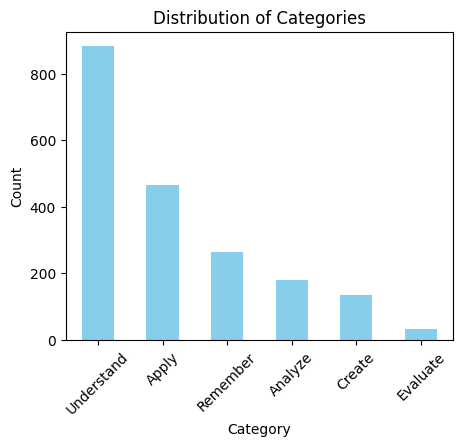

In [44]:
import matplotlib.pyplot as plt

# Plot the distribution of categories
plt.figure(figsize=(5, 4))
data['Category'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


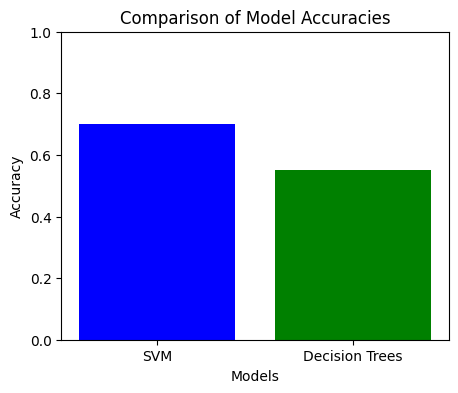

In [42]:
import matplotlib.pyplot as plt

# Define model names and corresponding accuracies
model_names = ['SVM', 'Decision Trees']
model_accuracies = [accuracy_score(y_test, svm_pred), accuracy_score(y_test, dt_pred)]

# Plotting bar graph
plt.figure(figsize=(5, 4))
plt.bar(model_names, model_accuracies, color=['blue', 'green'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim(0, 1)  # Set the y-axis limit to 0-1 for accuracy
plt.show()



In [86]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import os

# Define a function to generate word clouds for each category
def generate_wordclouds(data, output_dir='wordclouds'):
    # Create output directory if it doesn't exist
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    categories = data['Category'].unique()
    
    for category in categories:
        text = ' '.join(data[data['Category'] == category]['Question'])
        
        wordcloud = WordCloud(width=400, height=400, 
                              background_color='white', 
                              stopwords=stopwords.words('english'), 
                              min_font_size=10).generate(text) 
        
        # Plot word cloud
        plt.figure(figsize=(4, 4), facecolor=None) 
        plt.imshow(wordcloud) 
        plt.axis("off") 
        plt.tight_layout(pad=0) 
        
        plt.title(f'Word Cloud for Category: {category}')
        
        # Save word cloud as image
        output_path = os.path.join(output_dir, f'wordcloud_{category}.png')
        plt.savefig(output_path, bbox_inches='tight')
        plt.close()  # Close the plot to release memory
        
        print(f'Word cloud for category {category} saved as {output_path}')

# Call the function with your dataset
generate_wordclouds(data)


Word cloud for category Analyzing  saved as wordclouds\wordcloud_Analyzing .png
Word cloud for category Remembering saved as wordclouds\wordcloud_Remembering.png
Word cloud for category Remembering  saved as wordclouds\wordcloud_Remembering .png
Word cloud for category Understanding  saved as wordclouds\wordcloud_Understanding .png
Word cloud for category Analyzing saved as wordclouds\wordcloud_Analyzing.png
Word cloud for category Evaluating  saved as wordclouds\wordcloud_Evaluating .png
Word cloud for category Understanding saved as wordclouds\wordcloud_Understanding.png
Word cloud for category Creating  saved as wordclouds\wordcloud_Creating .png
Word cloud for category Applying  saved as wordclouds\wordcloud_Applying .png


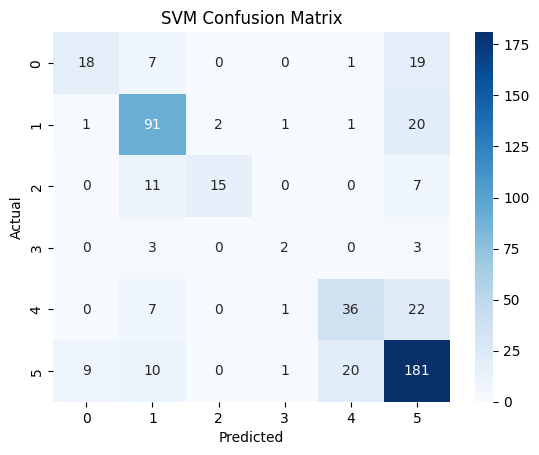

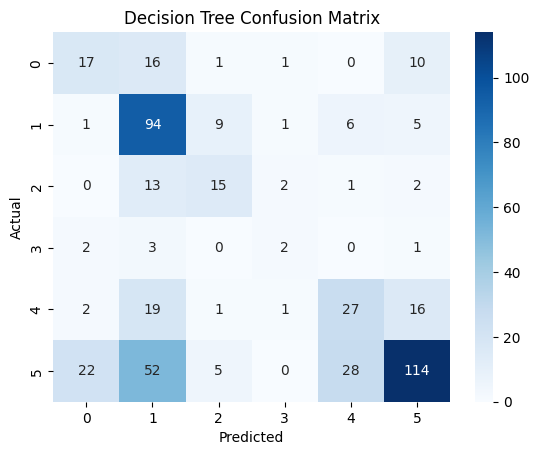

In [41]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Define a function to plot the confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

# Call the function for SVM classifier
plot_confusion_matrix(y_test, svm_pred, 'SVM Confusion Matrix')

# Call the function for Decision Tree classifier
plot_confusion_matrix(y_test, dt_pred, 'Decision Tree Confusion Matrix')


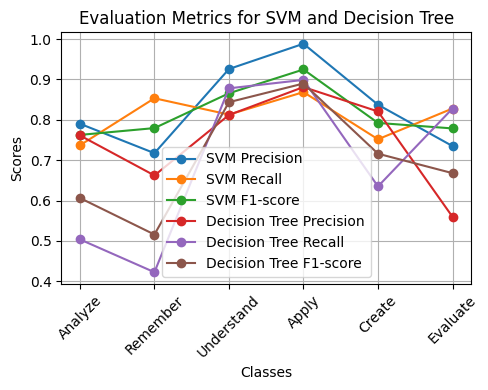

In [7]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
import matplotlib.pyplot as plt

# Calculate precision, recall, and F1-score for each class
precision_svm, recall_svm, fscore_svm, _ = precision_recall_fscore_support(y_test, svm_pred, average=None)
precision_dt, recall_dt, fscore_dt, _ = precision_recall_fscore_support(y_test, dt_pred, average=None)
accuracy = accuracy_score(y_test, svm_pred)

# Get class names
classes = data['Category'].unique()

# Plot precision, recall, and F1-score for each class
plt.figure(figsize=(5, 4))
plt.plot(classes, precision_svm, marker='o', label='SVM Precision')
plt.plot(classes, recall_svm, marker='o', label='SVM Recall')
plt.plot(classes, fscore_svm, marker='o', label='SVM F1-score')

plt.plot(classes, precision_dt, marker='o', label='Decision Tree Precision')
plt.plot(classes, recall_dt, marker='o', label='Decision Tree Recall')
plt.plot(classes, fscore_dt, marker='o', label='Decision Tree F1-score')

plt.xlabel('Classes')
plt.ylabel('Scores')
plt.title('Evaluation Metrics for SVM and Decision Tree')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [6]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
import pickle
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# Download nltk data
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Load the dataset
#url = "https://github.com/anjulaUmayanga/DataSet/blob/main/ExamQuestions.csv
#data = pd.read_csv(url, encoding='latin-1')
file_path = r'D:/Research/dataset/set/New folder/ExamQuestions.csv'
data = pd.read_csv(file_path, encoding='latin-1')

# Remove duplicates
data.drop_duplicates(subset='Question', keep='first', inplace=True)

# Fix the class labels (remove leading/trailing spaces and correct any inconsistencies)
data['Category'] = data['Category'].str.strip().str.capitalize()

# Map inconsistent labels to correct ones if needed
category_mapping = {
    'Analyze': 'Analyze',
    'Apply': 'Apply',
    'Create': 'Create',
    'Evaluate': 'Evaluate',
    'Remember': 'Remember',
    'Understand': 'Understand'
}
data['Category'] = data['Category'].map(category_mapping)

# Preprocess the data
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text)
    
    # Removing stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.lower() not in stop_words]
    
    # Stemming and Lemmatization
    stemmer = PorterStemmer()
    lemmatizer = WordNetLemmatizer()
    tokens = [stemmer.stem(lemmatizer.lemmatize(word)) for word in tokens]
    
    return ' '.join(tokens)

data['Question'] = data['Question'].apply(preprocess_text)

# Feature extraction using TF-IDF
tfidf = TfidfVectorizer(ngram_range=(1, 3), max_features=15000)

# Preparing the data
X = tfidf.fit_transform(data['Question'])
y = data['Category']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Initialize models with selected hyperparameters
svm = SVC(kernel='linear', C=0.5, class_weight='balanced', random_state=42)
dt = DecisionTreeClassifier(max_depth=30, min_samples_split=3, min_samples_leaf=1, class_weight='balanced', random_state=42)

# Train models
svm.fit(X_train_res, y_train_res)
dt.fit(X_train_res, y_train_res)

# Evaluation on test set
svm_pred = svm.predict(X_test)
dt_pred = dt.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, svm_pred))
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))

# Select the best model
best_model = svm if accuracy_score(y_test, svm_pred) > accuracy_score(y_test, dt_pred) else dt

# Print classification reports
print("\nSVM Classification Report:")
print(classification_report(y_test, svm_pred))

print("\nDecision Tree Classification Report:")
print(classification_report(y_test, dt_pred))

# Save the best model
with open('best_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

# Example prediction
sample_question = "Differentiate Qualitative data and Quantitative data. Give suitable examples."
processed_sample = preprocess_text(sample_question)
sample_tfidf = tfidf.transform([processed_sample])
predicted_category = best_model.predict(sample_tfidf)
print(f'Predicted Category: {predicted_category[0]}')

# Function to predict category for a new question
def predict_category(question):
    processed_question = preprocess_text(question)
    question_tfidf = tfidf.transform([processed_question])
    return best_model.predict(question_tfidf)[0]

# Example usage
print(predict_category("Give five characteristics of quality information"))
data.head(3)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Anjula\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Anjula\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Anjula\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


SVM Accuracy: 0.8069963811821471
Decision Tree Accuracy: 0.7032569360675512

SVM Classification Report:
              precision    recall  f1-score   support

     Analyze       0.79      0.74      0.76       133
       Apply       0.72      0.85      0.78       116
      Create       0.93      0.81      0.87       123
    Evaluate       0.99      0.87      0.92        99
    Remember       0.84      0.75      0.79       137
  Understand       0.73      0.83      0.78       221

    accuracy                           0.81       829
   macro avg       0.83      0.81      0.82       829
weighted avg       0.82      0.81      0.81       829


Decision Tree Classification Report:
              precision    recall  f1-score   support

     Analyze       0.76      0.50      0.61       133
       Apply       0.66      0.42      0.52       116
      Create       0.81      0.88      0.84       123
    Evaluate       0.88      0.90      0.89        99
    Remember       0.82      0.64      0.72 

,Question,Category
0,differenti qualit data quantit data . give sui...,Analyze
1,give five ( 05 ) characterist qualiti inform,Remember
2,state three ( 03 ) main role ict societi .,Remember
